# CMU Portugal Case Study
> Q4 2024

In [1]:
import numpy as np
import pandas as pd     

# Dataset - Estimation of Obesity Levels in Central America
(<a href = "https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">Link to data source</a>)

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Dataset Characteristics: Multivariate

Subject Area: Health and Medicine

Associated Tasks: Classification, Regression, Clustering

Feature Type: Integer

Instance Count: 2111

Feature Count: 16

In [2]:
dataset_path = "dataset/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(dataset_path)

# Preview data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Simplify data labels

In [4]:
# generate column names to relabel

df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
# simplify the column names

new_column_names = {
    'family_history_with_overweight': 'Family Overweight',
    'FAVC': 'High Cal Food', 
    'FCVC': 'Qty Vegetables', 
    'NCP': 'Qty Meals', 
    'CAEC': 'Eat Btw Meals', 
    'SMOKE': 'Smoker', 
    'CH2O': 'Qty Water', 
    'SCC': 'Monitor Calories', 
    'FAF': 'Qty Phys Activity', 
    'TUE': 'Hrs Use Technology',
    'CALC': 'Frq Alcohol', 
    'MTRANS': 'Mtd Transit', 
    'NObeyesdad': 'Obesity Level',      
}

# rename the columns based on the new_collumn_names dictionary
df = df.rename(columns=new_column_names)

df.head()

,Gender,Age,Height,Weight,Family Overweight,High Cal Food,Qty Vegetables,Qty Meals,Eat Btw Meals,Smoker,Qty Water,Monitor Calories,Qty Phys Activity,Hrs Use Technology,Frq Alcohol,Mtd Transit,Obesity Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Find and address null values

In [6]:
# Find nulls
# Nothing to address in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              2111 non-null   object 
 1   Age                 2111 non-null   float64
 2   Height              2111 non-null   float64
 3   Weight              2111 non-null   float64
 4   Family Overweight   2111 non-null   object 
 5   High Cal Food       2111 non-null   object 
 6   Qty Vegetables      2111 non-null   float64
 7   Qty Meals           2111 non-null   float64
 8   Eat Btw Meals       2111 non-null   object 
 9   Smoker              2111 non-null   object 
 10  Qty Water           2111 non-null   float64
 11  Monitor Calories    2111 non-null   object 
 12  Qty Phys Activity   2111 non-null   float64
 13  Hrs Use Technology  2111 non-null   float64
 14  Frq Alcohol         2111 non-null   object 
 15  Mtd Transit         2111 non-null   object 
 16  Obesit

# Look for Outliers

In [7]:
# By comparing the mean to the max & min, we dont see outliers (in the numeric variables) from this method
df.describe()

,Age,Height,Weight,Qty Vegetables,Qty Meals,Qty Water,Qty Phys Activity,Hrs Use Technology
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


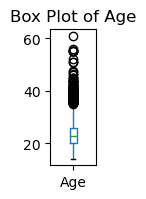

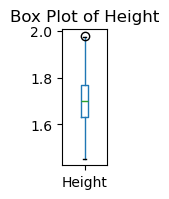

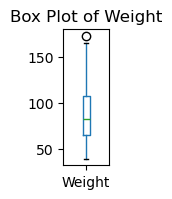

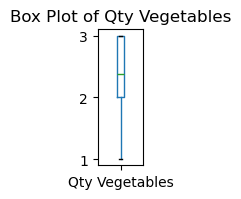

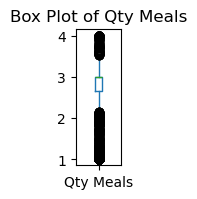

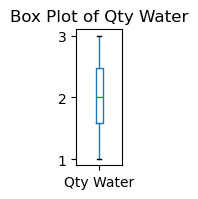

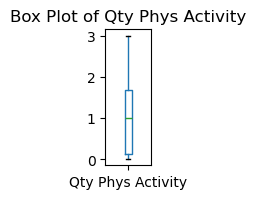

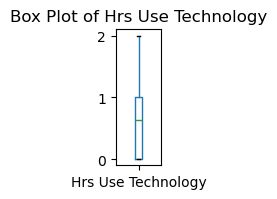

In [8]:
# Box plot to graphically show outlier analysis from above
# Next, find out how to improve UX by plotting in grids

import matplotlib.pyplot as plt

float_df=df.iloc[:,[1,2,3,6,7,10,12,13]] # makeing df of just float values in original df

for x in range(len(float_df.columns.values)):
    plt.figure(figsize=(2, 6))
    plt.subplot(3,3,x+1) #attempting to print output in grid
    df.boxplot(column=float_df.columns.values[x], grid=False)
    plt.title("Box Plot of " + float_df.columns.values[x])
    plt.suptitle('')  # Suppress automatic title
    plt.show()

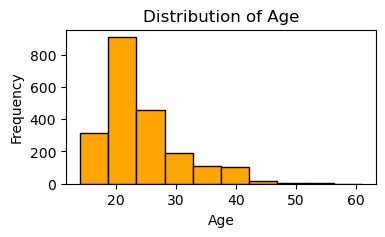

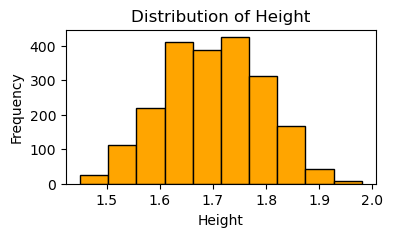

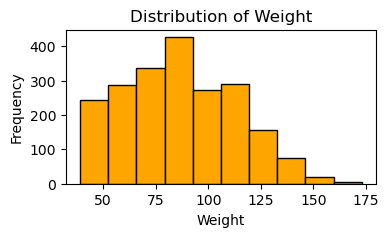

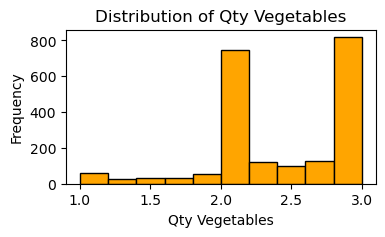

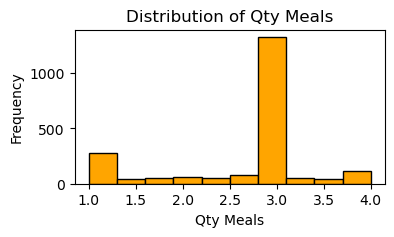

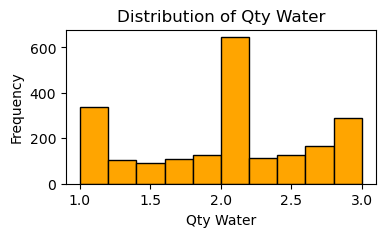

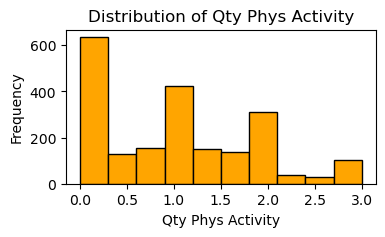

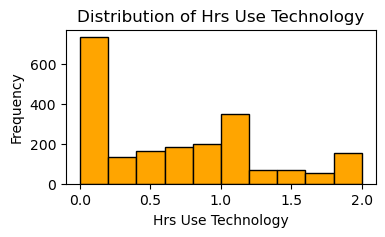

In [9]:
# Look for outliers by graphing histograms (numeric variables)

for x in range(len(float_df.columns.values)):
    plt.figure(figsize=(4, 2))
    df[float_df.columns.values[x]].plot(kind='hist', bins=10, color='orange', edgecolor='black')
    plt.title("Distribution of "+ float_df.columns.values[x])
    plt.xlabel(float_df.columns.values[x])
    plt.ylabel("Frequency")
    plt.show()

# Descriptive Statistics

In [10]:
df

,Gender,Age,Height,Weight,Family Overweight,High Cal Food,Qty Vegetables,Qty Meals,Eat Btw Meals,Smoker,Qty Water,Monitor Calories,Qty Phys Activity,Hrs Use Technology,Frq Alcohol,Mtd Transit,Obesity Level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
# Show unique values for each column

text_df=df.iloc[:,[0,4,5,8,9,11,14,15,16]] # create df of only text values from original df - Find better way!

for x in range(len(text_df.columns.values)):
    print("Values for "+ text_df.columns.values[x]) 
    print(df[text_df.columns.values[x]].unique())
    print()

Values for Gender
['Female' 'Male']

Values for Family Overweight
['yes' 'no']

Values for High Cal Food
['no' 'yes']

Values for Eat Btw Meals
['Sometimes' 'Frequently' 'Always' 'no']

Values for Smoker
['no' 'yes']

Values for Monitor Calories
['no' 'yes']

Values for Frq Alcohol
['no' 'Sometimes' 'Frequently' 'Always']

Values for Mtd Transit
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

Values for Obesity Level
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']



In [12]:
# Show count of males vs females, smokers vs non, etc

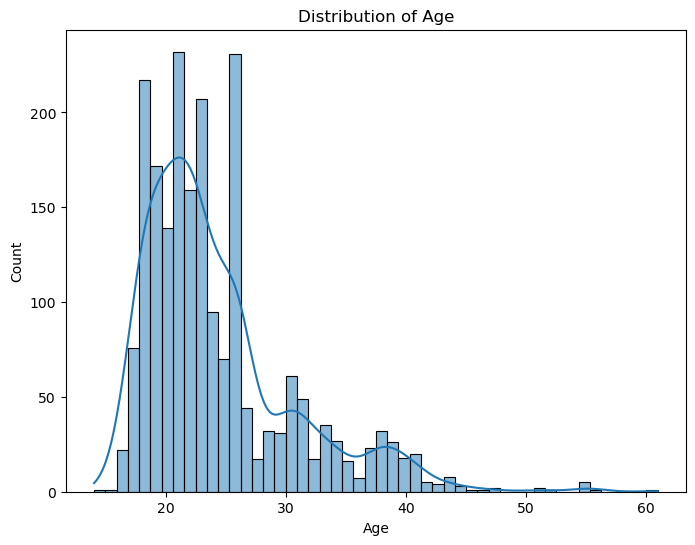

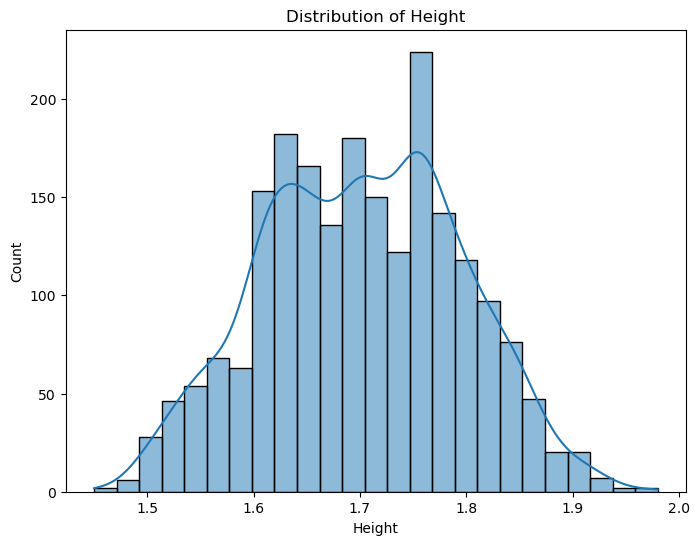

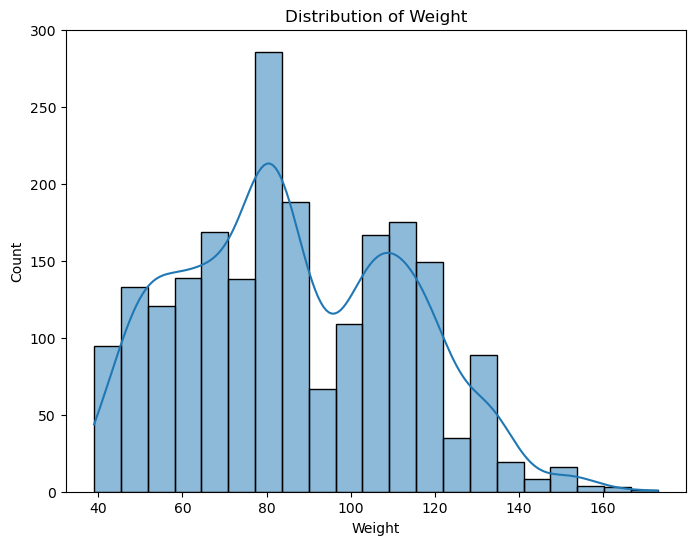

In [13]:
# Histograms (age, height and weight)
import seaborn as sns    # To install run, start ANACONDA PROMPT, activate desired environment and run "pip install seaborn"

selection = ['Age', 'Height', 'Weight']
 
for i in range(len(selection)):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[selection[i]], bins="auto", kde=True)
    plt.title("Distribution of " + selection[i])
    plt.show()

                         Age    Height    Weight  Qty Vegetables  Qty Meals  \
Age                 1.000000 -0.025958  0.202560        0.016291  -0.043944   
Height             -0.025958  1.000000  0.463136       -0.038121   0.243672   
Weight              0.202560  0.463136  1.000000        0.216125   0.107469   
Qty Vegetables      0.016291 -0.038121  0.216125        1.000000   0.042216   
Qty Meals          -0.043944  0.243672  0.107469        0.042216   1.000000   
Qty Water          -0.045304  0.213376  0.200575        0.068461   0.057088   
Qty Phys Activity  -0.144938  0.294709 -0.051436        0.019939   0.129504   
Hrs Use Technology -0.296931  0.051912 -0.071561       -0.101135   0.036326   

                    Qty Water  Qty Phys Activity  Hrs Use Technology  
Age                 -0.045304          -0.144938           -0.296931  
Height               0.213376           0.294709            0.051912  
Weight               0.200575          -0.051436           -0.071561  
Qty 

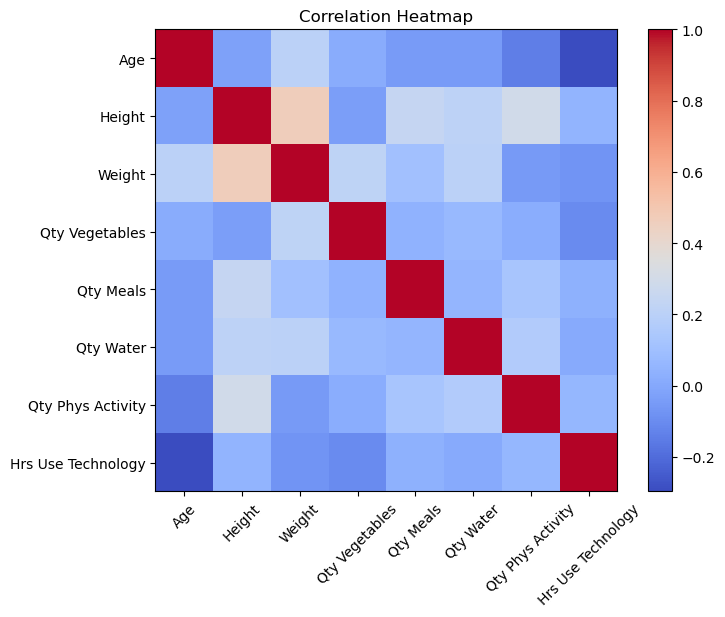

In [14]:
# Calculate coorelation between numeric variables 

plt.figure(figsize=(8, 6))
correlation = df.corr(numeric_only=True)
print(correlation)

plt.imshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap")
plt.show()

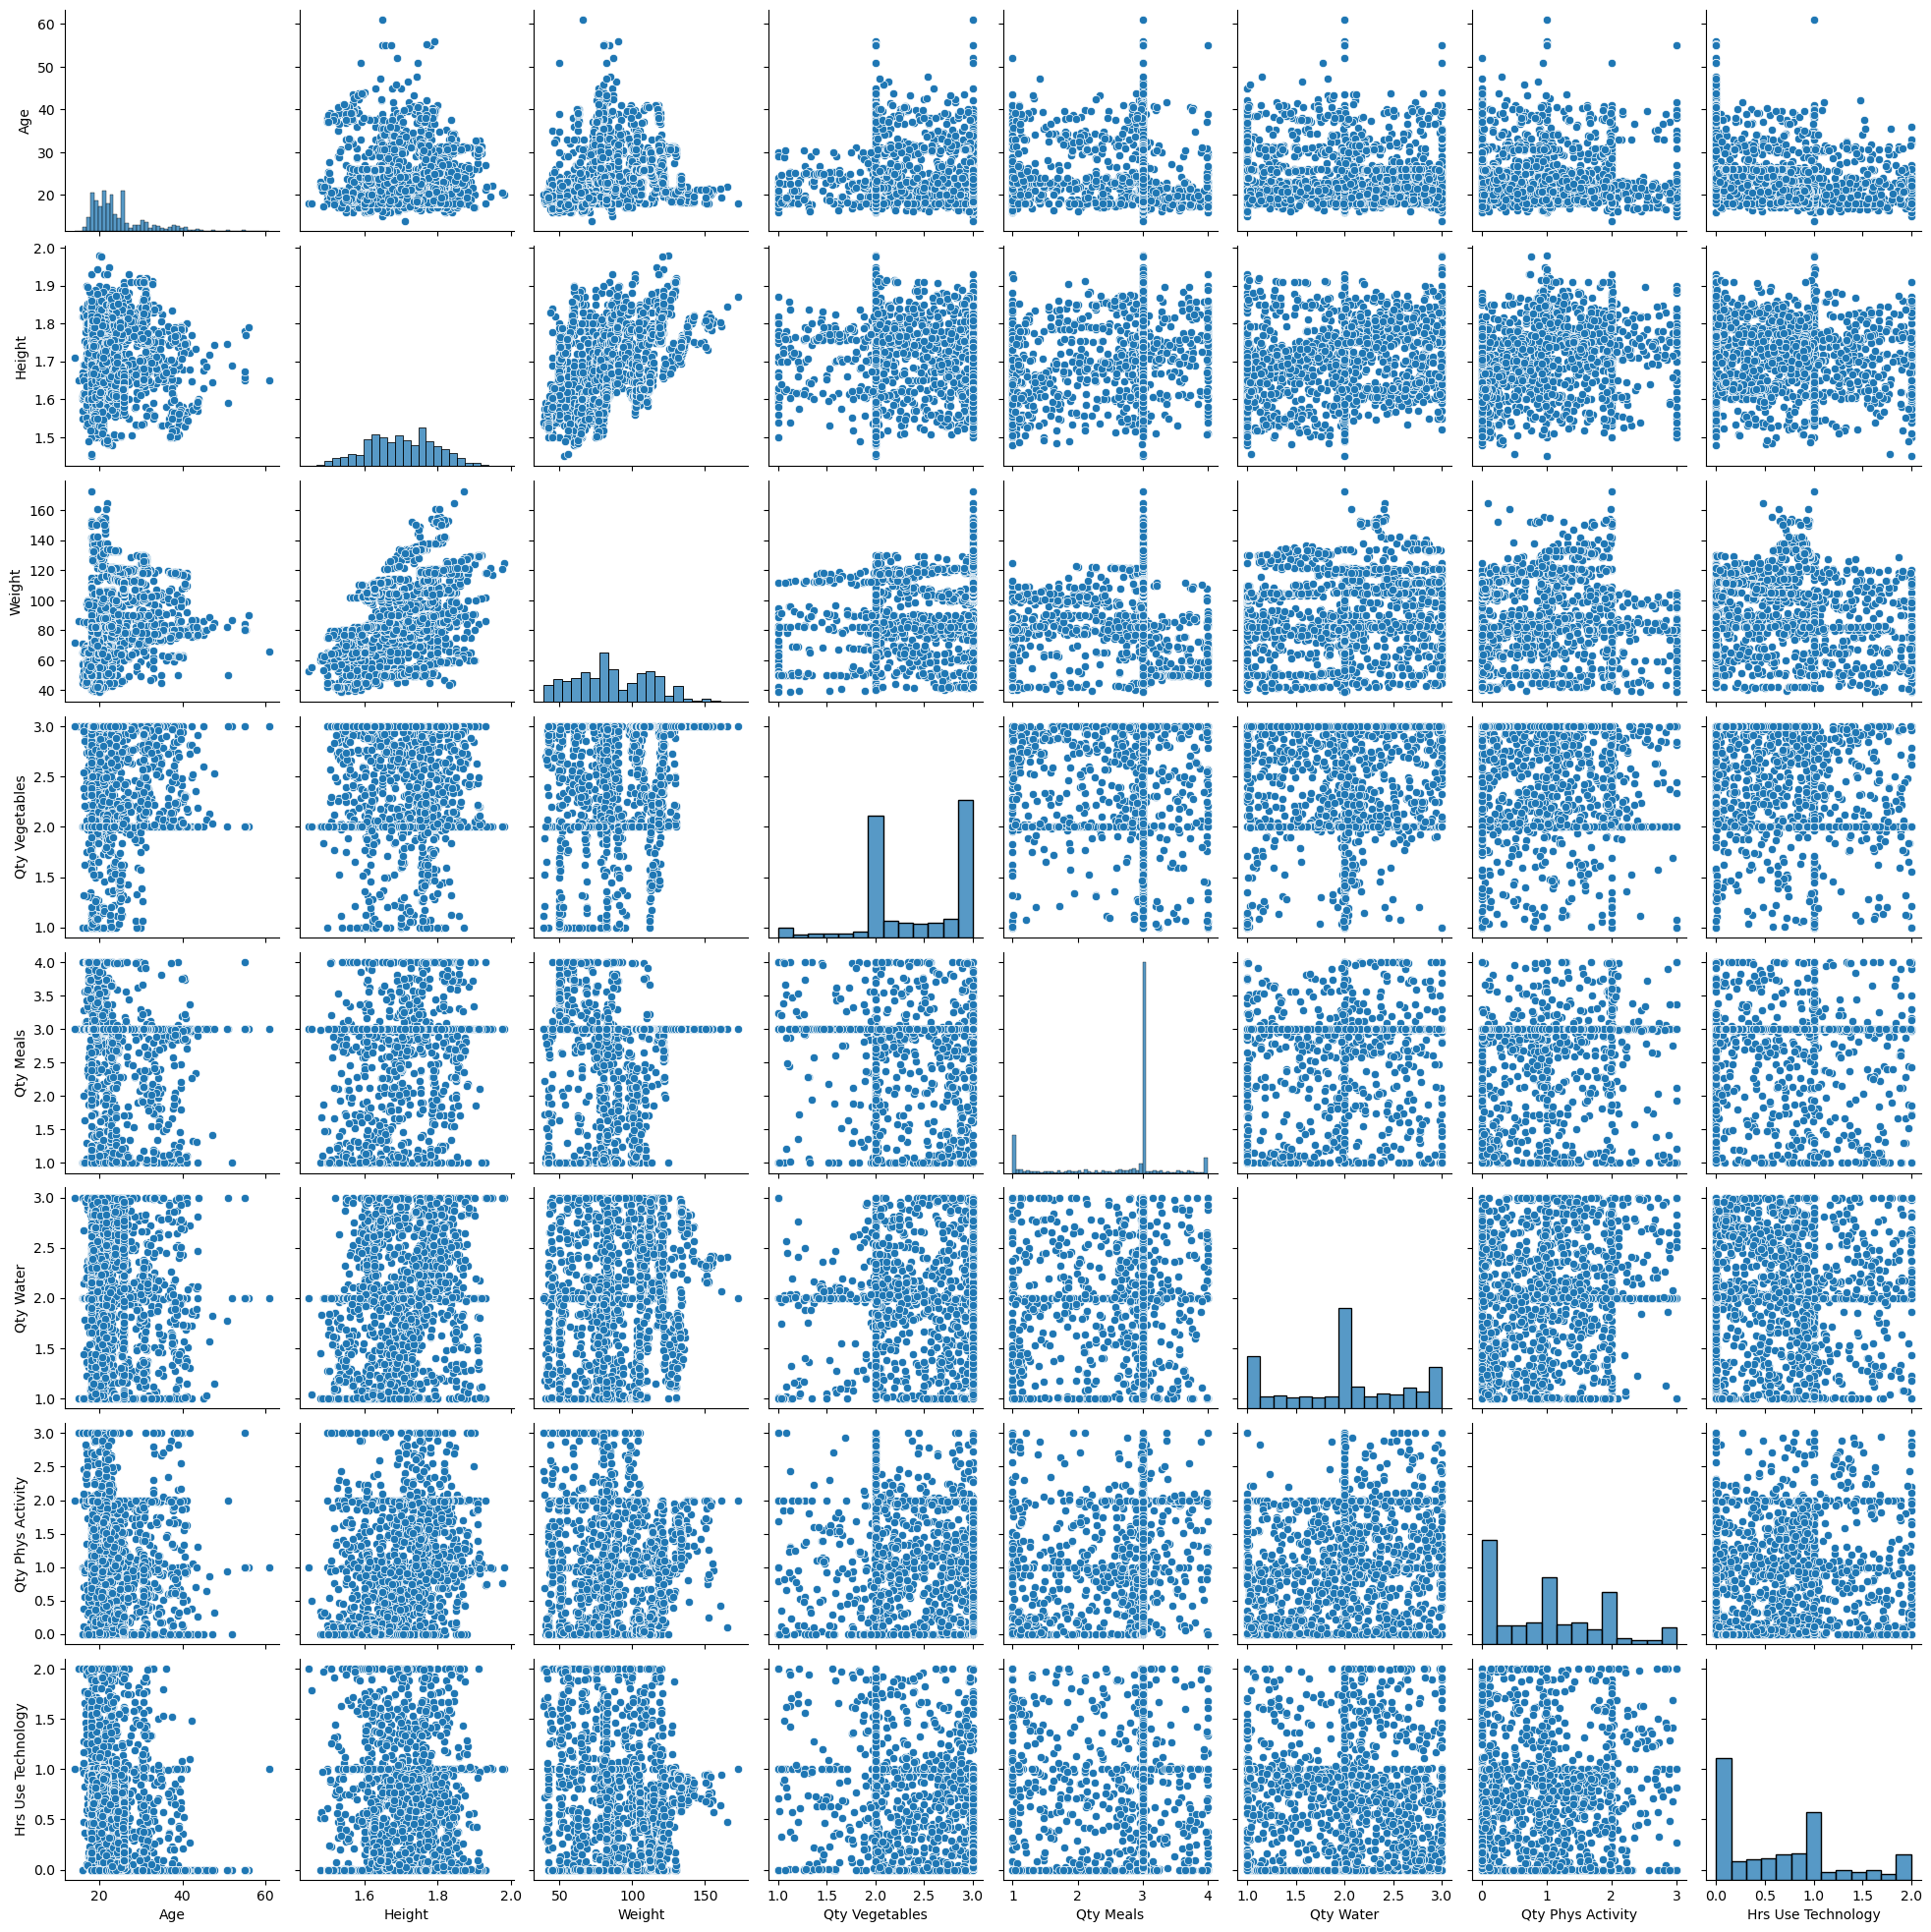

In [15]:
# Create pairplot to visualize relationship between all variables 

# This is added here for the chart to work, but also duplicated below in data transformation section
df["BMI"] = df["Weight"] / df["Height"] ** 2

#plt.figure(figsize=(8, 6))
sns.pairplot(float_df)
#plt.show()

<Axes: xlabel='BMI', ylabel='Qty Phys Activity'>

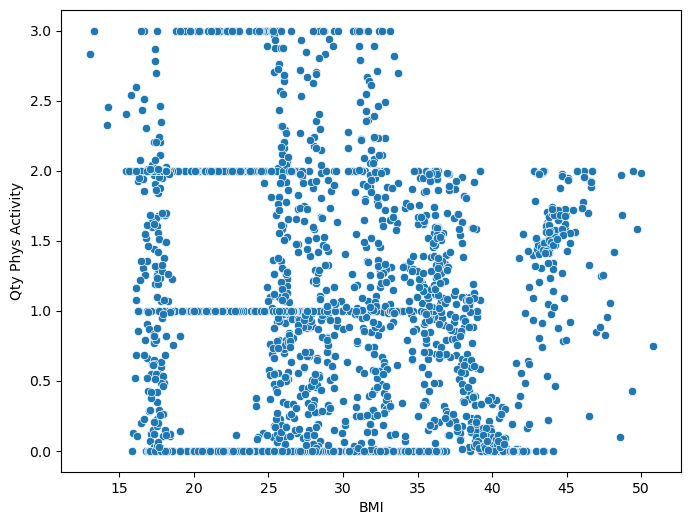

In [16]:
'''
From pairplot above, we noticed strange behavior in the data and determined it was caused by synthetic data.  

Per the dataset description: "77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 
23% of the data was collected directly from users through a web platform."

Below is a scatterplot of one of the more extreme examples.

In the example below, the 23% of data that was survey data was likely integer data (the horizontal lines in the chart); 
however, the synthetic data was created to be float (the rest of the chart datapoints)
'''

plt.figure(figsize=(8, 6))
sns.scatterplot(df, x="BMI", y="Qty Phys Activity")

# Data Transformations and Encoding

In [17]:
# In this section, we will add transformations to the output variables

# Add BMI metric
# Use this for regression output to predict BMI
df["BMI"] = df["Weight"] / df["Height"] ** 2

# Add boolean (1=overweight [BMI>=30] and 0 = not overweight [BMI<30])
# Use this for logistic regression output
df["Fitness_Bool"] = np.where(df["BMI"] >= 30, 1, 0)


''' 
Add numeric values for categories of fitness level:
Use this for clustering analysis (var Normal_Weight)
0 = Insufficient weight
1 = Normal weight
2 = Overweight I
3 = Overweight II
4 = Obese I
5 = Obese II
6 = Obese III
'''
# df["Obesity Level"].unique() Shows unique values for column

df["Fitness_Cat"] = np.where(df["Obesity Level"] == 'Insufficient_Weight', 0,
                    np.where(df["Obesity Level"] == 'Normal_Weight', 1,
                    np.where(df["Obesity Level"] == 'Overweight_Level_I', 2,
                    np.where(df["Obesity Level"] == 'Overweight_Level_II', 3,
                    np.where(df["Obesity Level"] == 'Obesity_Type_I', 4,
                    np.where(df["Obesity Level"] == 'Obesity_Type_II', 5,
                             '6'))))))

In [18]:
# In this section we will encode text data to machine readable formats
# Make sure to use 1 -- NUMBER, instead of '1' -- TEXT

# Gender
df["Gender_Bool"] = np.where(df["Gender"] == "Male", 1, 0)

# Family overweight
df["Family Overweight_Bool"] = np.where(df["Family Overweight"] == "yes", 1, 0)

# High Cal Food
df["High Cal Food_Bool"] = np.where(df["High Cal Food"] == "yes", 1, 0)

# Eat Btw Meals
df["Eat Btw Meals_Encoded"] = np.where(df["Eat Btw Meals"] == 'no', 0,
                    np.where(df["Eat Btw Meals"] == 'Sometimes', 1,
                    np.where(df["Eat Btw Meals"] == 'Frequently', 2,
                             3
                    )))

# Smoker -  98% of data are non-smokers, so this column wont have value -- remove this column from analysis
# 1st confirm that appropriate action is take before change df -- print( df.drop('Smoker', axis=1))
df=df.drop('Smoker', axis=1) #Data frame is actually modified in this line

# Monitor Calories -  95% dont monitor calores, so this column wont have value -- remove this column from analysis
# 1st confirm that appropriate action is take before change df -- print( df.drop('Monitor Calories', axis=1))
df=df.drop('Monitor Calories', axis=1) #Data frame is actually modified in this line

# Frq Alcohol
# print(df["Frq Alcohol"].unique()) -- see uniques
df["Frq Alcohol_Encoded"] = np.where(df["Frq Alcohol"] == 'no', 0,
                    np.where(df["Frq Alcohol"] == 'Sometimes', 1,
                    np.where(df["Frq Alcohol"] == 'Frequently', 2,
                             3
                    )))

# Mtd Transit
#print(df["Mtd Transit"].unique())
df["Mtd Transit_Encoded"] = np.where(df["Mtd Transit"] == 'Walking', 0,
                    np.where(df["Mtd Transit"] == 'Bike', 1,
                    np.where(df["Mtd Transit"] == 'Public_Transportation', 2,
                    np.where(df["Mtd Transit"] == 'Motorbike', 3,         
                             4                             
                    ))))


# Feature Scaling

In [19]:
'''
In this section we will scale ONLY THE VECTOR FEATURES, including:
Age
Height
Weight
Qty Vegtables
Qty Meals
Qty Water
Qty Phys Activity
Hrs Use Technology
'''

'\nIn this section we will scale ONLY THE VECTOR FEATURES, including:\nAge\nHeight\nWeight\nQty Vegtables\nQty Meals\nQty Water\nQty Phys Activity\nHrs Use Technology\n'

# Create Dataframe with only transformed and scaled features 

In [20]:
# Here, we create "analysis_df", a numeric only subset of the above dataframe that contains only the transformed and scaled features
# (to be used for the rest of the analysis)

analysis_df = df.iloc[:,[0,4,5,8,9,11,14,15,16]] # UPDATE COLUMN NUMBERS!!!

# Split Dataset into Test and Train sections

# Feature Selection

In [21]:
# Perform feature selection ONLY on the TRAIN DATASET

# Validation

# Run final test on test data

# Other Tests to Consider

In [22]:
'''
Other Tests to Consider:

Logistic regression
Classification
Remove fake data and redo

Copy this file to do other tests
'''

'\nOther Tests to Consider:\n\nLogistic regression\nClassification\nRemove fake data and redo\n\nCopy this file to do other tests\n'